In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# K-en yakın komşu MODELİ (KNN)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

In [4]:
data = pd.read_csv("./Hitters.csv")
df = data.copy()
df = df.dropna()
Y = df["Salary"]
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["League", "Division","NewLeague","Salary"], axis = 1).astype("float64")
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)


In [5]:
X_train, X_test , Y_train, Y_test = train_test_split(X,
                                                     Y,
                                                     test_size=0.25,
                                                     random_state=42)

In [6]:
knn_model = KNeighborsRegressor().fit(X_train, Y_train)
knn_model
#model başarıyla kuruldu

KNeighborsRegressor()

### Şimdi Tahmin edelim ve test hatalarını kontrol edelim.

In [7]:
#validasyon seti için hata kareler ortalama hatası
np.sqrt(mean_squared_error(Y_train,knn_model.predict(X_train)))

239.6467132541376

In [8]:
#validasyon seti için r^2 değerinin hesaplanması
print("r2 değeri(Validasyon İçin):",r2_score(Y_train, knn_model.predict(X_train)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Validasyon İçin):", 1-r2_score(Y_train, knn_model.predict(X_train)))

r2 değeri(Validasyon İçin): 0.7098044054379578
r2 değerinin Anlamlılık Testi(Validasyon İçin): 0.29019559456204225


In [9]:
#test seti için hata kareler ortalama hata metrik değerlendirmesi
print("Hata Kareler Ortalama Test Hata Değeri:",np.sqrt(mean_squared_error(Y_test,knn_model.predict(X_test))))

Hata Kareler Ortalama Test Hata Değeri: 426.6570764525201


In [10]:
#test seti için  r2 ortalama hata metrik değerlendirmesi
print("r2 değeri(Test seti İçin):",r2_score(Y_test,knn_model.predict(X_test)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Test seti İçin):", 1-r2_score(Y_test, knn_model.predict(X_test)))

r2 değeri(Test seti İçin): 0.1590920400477076
r2 değerinin Anlamlılık Testi(Test seti İçin): 0.8409079599522924


In [11]:
RMSE = []
for i in range(10):
    i = i+1
    knn_model = KNeighborsRegressor(n_neighbors=i).fit(X_train, Y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(Y_train, y_pred= y_pred))
    RMSE.append(rmse)
    print("k=",i, "için RMSE Değeri:", rmse)

    

k= 1 için RMSE Değeri: 0.0
k= 2 için RMSE Değeri: 179.52761335480352
k= 3 için RMSE Değeri: 205.20157172291863
k= 4 için RMSE Değeri: 220.5139794876305
k= 5 için RMSE Değeri: 239.6467132541376
k= 6 için RMSE Değeri: 243.5904190007242
k= 7 için RMSE Değeri: 258.1478781634636
k= 8 için RMSE Değeri: 266.05374203349805
k= 9 için RMSE Değeri: 269.73782093553376
k= 10 için RMSE Değeri: 271.2798300436963


### bundan öncek modellerde yani ridge regresyon, lasso regresyon ve elasticnette hiperparametre,
### analizi yaparken kendine özel hiperparametre bulma fonksiyonları vardı.
### bundan sonraki süreçteki modellerin fine tuning kısmında hiperparametre ayarlaması yaparken,
### GridSearchCV kullanacağız

In [12]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV parametrelerin alabileiceği tüm kombinasyonları değerlendirir ve en optimal hiperparametre,
#değerini bize verir.

# Model Tuning

In [13]:
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

## Modelimiz için en iyi komşu sayısı parametresini bulabilmek adına knn_cv_model.best_params_["n_neighbors"] yazarak en iyi komşu sayısını alacağız.

In [14]:
knn_cv_model.best_params_["n_neighbors"]

8

## Çıktıdan da gördülüğü üzere kullanmamız gereken komşu sayısı 8'dir

In [15]:
knn_tuned = KNeighborsRegressor(n_neighbors= knn_cv_model.best_params_["n_neighbors"])
knn_tuned = knn_tuned.fit(X_train, Y_train)

## Modelimizi kurduk şimdi ise validasyon ve test hatalarımızı değerlendirelim.

In [16]:
#Validasyon evresinin hata kareler ortalamasını hespalayalım.
print("Hata Kareler Ortalaması: ", np.sqrt(mean_squared_error(Y_train, knn_tuned.predict(X_train))))

Hata Kareler Ortalaması:  266.05374203349805


In [17]:
#Validasyon evresinin r^2 hata metriğini hesaplayalım
print("Validasyon için R^2 Değeri:", r2_score(Y_train, knn_tuned.predict(X_train)))
#Anlamlılık testi yapalım yani 1'den çıkartalım değerimiz 1'e yakınsa anlamsız 0 a yakınsa anlamlı
print("Validasyon Seti için r^2 anlamlılık testi:", 1-r2_score(Y_train, knn_tuned.predict(X_train)))

Validasyon için R^2 Değeri: 0.642326631887348
Validasyon Seti için r^2 anlamlılık testi: 0.35767336811265205


In [18]:
#Test Seti için hata kareler ortalama değeri
print("Test Seti için hata kareler ortalaması:", np.sqrt(mean_squared_error(Y_test, knn_tuned.predict(X_test))))

Test Seti için hata kareler ortalaması: 413.7094731463598


In [19]:
#test seti için r^2 değerlerinin hesaplanması
print("Test Setinin r^2 değeri", r2_score(Y_test, knn_tuned.predict(X_test)))
#test seti için r^2 değerinin anlamlılık oranı eğer çıkan değer 0 a yaklaşırsa anlamlı 1 e yaklaşırsa anlamsız
print("Test Seti için r^2 anlamlılık testi", 1-r2_score(Y_test, knn_tuned.predict(X_test)))

Test Setinin r^2 değeri 0.2093550739421146
Test Seti için r^2 anlamlılık testi 0.7906449260578854


# SVR (DESTEK VEKTÖR REGRESYONU)

### SVR'nin temel amacı, veri noktalarını belirli bir eğriye oturtmaktır. Ancak, bu eğriyi belirlerken, belirli bir hata payını (tolerans) kabul eder. Bu hata payı, eğri ile veri noktaları arasındaki mesafenin bir ölçüsüdür.

## SVR'nin en önemli parametreleri şunlardır:

### Kernel: Veri noktaları arasındaki ilişkiyi tanımlayan bir fonksiyondur. Doğrusal, polinomiyal, RBF (Radyal Basis Function) gibi farklı çekirdek fonksiyonları kullanılabilir.
### C: Hata toleransını belirleyen bir parametredir. Bu değer, modelin ne kadar esnek veya katı olacağını belirler. Küçük C değerleri, daha fazla tolerans sağlar ve daha fazla eğriyi modellemeye izin verirken, büyük C değerleri, daha sıkı bir uyum sağlar.
### Epsilon: Eğri ile destek vektörleri arasındaki hata toleransını belirler. Bu, modelin veri noktalarını ne kadar yakından takip etmesi gerektiğini belirler.



### SVR'ın amacı aykırı değerlere göre regresyon denklemini çıkartmaktır.
### SVR'ın can alıcı anlamı ise şudur: SVR bize öyle bir regresyon denklemi verir ki, Gerçek değerler ile tahmin edilen değerler arasındaki fark epsilon ve aykırı değerler yani ksi'lerin toplamından her zaman küçük olacaktır. Ve sen gidip artık veriler arasında tahmin yaparken belirli bir aralık arasında tahmin yaparsın

In [20]:
hit = pd.read_csv('./Hitters.csv')
df = hit.copy()
df = df.dropna()
Y = df["Salary"] #bağımlı değişkenimi bir ayırdım.
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1)
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42)

In [22]:
#hits verisi üzerinden eğitim yapıp salary üzerinde bir tahmin yapalım
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [23]:
from sklearn.svm import SVR

In [24]:
svr_model = SVR(kernel='linear').fit(X_train, Y_train)

In [25]:
svr_model.predict(X_train)[0:5] #bağımlı değişkenlerin x_train yani hitterse göre modelin eğitimi sonucu ,
#tahmin edilen değerleri

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

### Aşağıda modelin formülünü görüyoruz. beta 1 ve beta 0 katsayılarının yerine yazılmış bir formunda

In [26]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.6975609756109 + 4.969512195121865 x


## SVR modelin tahminlerinden ilkini formülümüz ile test edelim.
## Tahmin değerimiz 403.52804878 bu değeri elde etmek için x yerine 91 yazmalıyız bunun sebebi X_train'in ilk değeri 91'dir

In [27]:
-48.6975609756109 + 4.969512195121865*91

403.52804878047885

## Sonuçlar incelendiğinde formülümüzde bir sorun yok

# Şimdi Doğrusal SVR'ın geometrik olarak ne ifade ettiğine bakalım

In [28]:
y_pred =svr_model.predict(X_train)

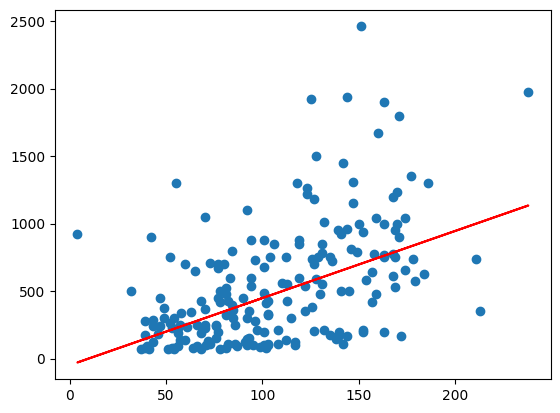

In [29]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_pred, color = 'r')

## Lineer regresyon modeli ile svr karşılaştırması yapalım.

Lr ile tahmin edilen ilk bağımlı değişken: [461.87941285]
y = -8.8140954803348 + 5.172456135470689 x


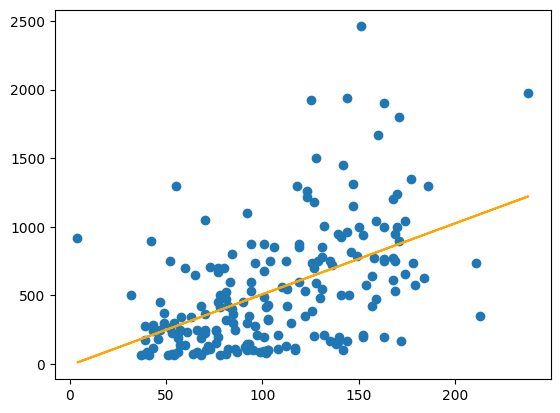

In [30]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, Y_train)
lm_pred = lm_model.predict(X_train)
plt.scatter(X_train, Y_train)
plt.plot(X_train, lm_pred, color = 'orange')
print("Lr ile tahmin edilen ilk bağımlı değişken:",lm_pred[0:1])
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

# LR ile SVR modelinin regresyon denklem eğrilerini inceleyelim

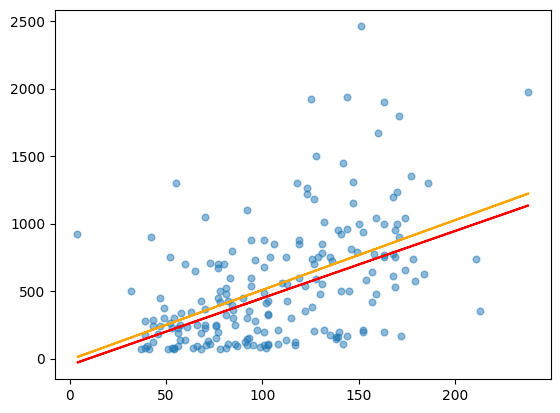

In [31]:
plt.scatter(X_train, Y_train, alpha=0.5, s = 23)
plt.plot(X_train, lm_pred, color = 'orange')
plt.plot(X_train, y_pred, color = 'r')

In [32]:
print("LR modelinin Tahmini:", lm_pred[0:1], "SVR modelinin tahmini", y_pred[0:1], "Gerçek Değer:", Y_train[0:1])

LR modelinin Tahmini: [461.87941285] SVR modelinin tahmini [403.52804878] Gerçek Değer: 183    125.0
Name: Salary, dtype: float64


## Yukarıdaki iki modeli de karşılaştırdığımızda SVR modeli LR modeline göre daha iyi tahmin yaptığı görülmektedir. Çünkü SVR modeli aykırı değerlere göre bu işlemi yapar. Ama LR modeli Aykırı değerlerden çok etkilenir

### SVR modeli için Validasyon ve Test Hataları

In [33]:
#validasyon seti için hata kareler ortalama hatası
np.sqrt(mean_squared_error(Y_train,svr_model.predict(X_train)))

389.97589200276946

In [34]:
#validasyon seti için r^2 değerinin hesaplanması
print("r2 değeri(Validasyon İçin):",r2_score(Y_train, svr_model.predict(X_train)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Validasyon İçin):", 1-r2_score(Y_train, svr_model.predict(X_train)))

r2 değeri(Validasyon İçin): 0.23153625785194087
r2 değerinin Anlamlılık Testi(Validasyon İçin): 0.7684637421480591


In [35]:
#test seti için hata kareler ortalama hata metrik değerlendirmesi
print("Hata Kareler Ortalama Test Hata Değeri:",np.sqrt(mean_squared_error(Y_test,svr_model.predict(X_test))))

Hata Kareler Ortalama Test Hata Değeri: 459.01879603651554


In [36]:
#test seti için  r2 ortalama hata metrik değerlendirmesi
print("r2 değeri(Test seti İçin):",r2_score(Y_test,svr_model.predict(X_test)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Test seti İçin):", 1-r2_score(Y_test, svr_model.predict(X_test)))

r2 değeri(Test seti İçin): 0.026689303489499272
r2 değerinin Anlamlılık Testi(Test seti İçin): 0.9733106965105007


# SVR Modelimizi Tune Edelim
## SVR modelini tune ederken C ayar parametrisi üzerine çalışacağız

In [37]:
svr_params = {'C':np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,Y_train) 

In [38]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [39]:
svr_tuned = SVR(kernel = "linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, Y_train)

In [40]:
#validasyon seti için hata kareler ortalama hatası
np.sqrt(mean_squared_error(Y_train,svr_tuned.predict(X_train)))

390.8172709547218

In [41]:
#validasyon seti için r^2 değerinin hesaplanması
print("r2 değeri(Validasyon İçin):",r2_score(Y_train, svr_tuned.predict(X_train)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Validasyon İçin):", 1-r2_score(Y_train, svr_tuned.predict(X_train)))

r2 değeri(Validasyon İçin): 0.22821673619563276
r2 değerinin Anlamlılık Testi(Validasyon İçin): 0.7717832638043672


In [42]:
#test seti için hata kareler ortalama hata metrik değerlendirmesi
print("Hata Kareler Ortalama Test Hata Değeri:",np.sqrt(mean_squared_error(Y_test,svr_tuned.predict(X_test))))

Hata Kareler Ortalama Test Hata Değeri: 458.19896678111655


In [43]:
#test seti için  r2 ortalama hata metrik değerlendirmesi
print("r2 değeri(Test seti İçin):",r2_score(Y_test,svr_tuned.predict(X_test)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Test seti İçin):", 1-r2_score(Y_test, svr_tuned.predict(X_test)))

r2 değeri(Test seti İçin): 0.030162956435922705
r2 değerinin Anlamlılık Testi(Test seti İçin): 0.9698370435640773


## Şu ana kadar sadece tek bağımsız değişken ile çalıştık şimdi ise tüm bağımsız değişkenlerimiz üzerinden modelimizi tekrardan eğitip tune edip hata metriklerini değerlendirelim

In [44]:
data = pd.read_csv("./Hitters.csv")
df = data.copy()
df = df.dropna()
Y = df["Salary"]
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["League", "Division","NewLeague","Salary"], axis = 1).astype("float64")
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [46]:
svr_model_for_all_data = SVR()
svr_params = {'C': np.arange(0.1,2,0.1)}
svr_cv_model_for_all_data = GridSearchCV(svr_model_for_all_data, svr_params, cv = 10).fit(X_train,Y_train)

In [47]:
print("En iyi C değeri: ",pd.Series(svr_cv_model_for_all_data.best_params_)[0])

En iyi C değeri:  1.9000000000000001


In [48]:
svr_tuned = SVR(kernel = "linear", C = pd.Series(svr_cv_model_for_all_data.best_params_)[0]).fit(X_train,Y_train)

KeyboardInterrupt: 

In [ ]:
#validasyon seti için hata kareler ortalama hatası
np.sqrt(mean_squared_error(Y_train,svr_tuned.predict(X_train)))

307.68082962836286

In [ ]:
#validasyon seti için r^2 değerinin hesaplanması
print("r2 değeri(Validasyon İçin):",r2_score(Y_train, svr_tuned.predict(X_train)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Validasyon İçin):", 1-r2_score(Y_train, svr_tuned.predict(X_train)))

r2 değeri(Validasyon İçin): 0.5216467412220658
r2 değerinin Anlamlılık Testi(Validasyon İçin): 0.4783532587779342


In [ ]:
#test seti için hata kareler ortalama hata metrik değerlendirmesi
print("Hata Kareler Ortalama Test Hata Değeri:",np.sqrt(mean_squared_error(Y_test,svr_tuned.predict(X_test))))

Hata Kareler Ortalama Test Hata Değeri: 373.89016022179095


In [ ]:
#test seti için  r2 ortalama hata metrik değerlendirmesi
print("r2 değeri(Test seti İçin):",r2_score(Y_test,svr_tuned.predict(X_test)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Test seti İçin):", 1-r2_score(Y_test, svr_tuned.predict(X_test)))

r2 değeri(Test seti İçin): 0.3542288648905805
r2 değerinin Anlamlılık Testi(Test seti İçin): 0.6457711351094195


In [ ]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [ ]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel = 'rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

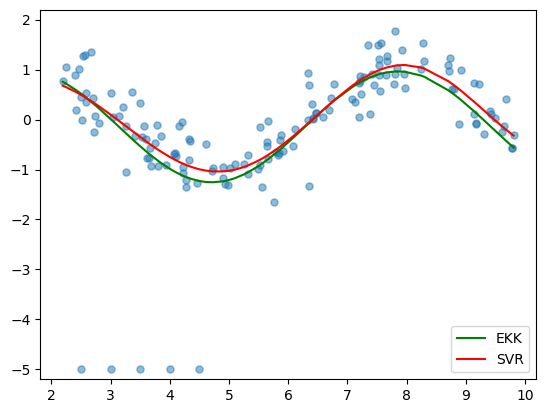

In [ ]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4)

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
svr_rbf = SVR(kernel = "rbf").fit(X_train, Y_train)

In [ ]:
#validasyon seti için hata kareler ortalama hatası
np.sqrt(mean_squared_error(Y_train,svr_rbf.predict(X_train)))

440.47169927311063

In [ ]:
#validasyon seti için r^2 değerinin hesaplanması
print("r2 değeri(Validasyon İçin):",r2_score(Y_train, svr_rbf.predict(X_train)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Validasyon İçin):", 1-r2_score(Y_train, svr_rbf.predict(X_train)))

r2 değeri(Validasyon İçin): 0.019643843013004036
r2 değerinin Anlamlılık Testi(Validasyon İçin): 0.980356156986996


In [ ]:
#test seti için hata kareler ortalama hata metrik değerlendirmesi
print("Hata Kareler Ortalama Test Hata Değeri:",np.sqrt(mean_squared_error(Y_test,svr_rbf.predict(X_test))))

Hata Kareler Ortalama Test Hata Değeri: 460.0032657244849


In [ ]:
#test seti için  r2 ortalama hata metrik değerlendirmesi
print("r2 değeri(Test seti İçin):",r2_score(Y_test,svr_rbf.predict(X_test)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Test seti İçin):", 1-r2_score(Y_test, svr_rbf.predict(X_test)))

r2 değeri(Test seti İçin): 0.02250985629101887
r2 değerinin Anlamlılık Testi(Test seti İçin): 0.9774901437089811


# Model Tuning

In [ ]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [ ]:
svr_tuned = SVR(kernel = "rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        Y_train)


In [ ]:
#validasyon seti için hata kareler ortalama hatası
np.sqrt(mean_squared_error(Y_train,svr_tuned.predict(X_train)))

323.54591099068784

In [ ]:
#validasyon seti için r^2 değerinin hesaplanması
print("r2 değeri(Validasyon İçin):",r2_score(Y_train, svr_tuned.predict(X_train)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Validasyon İçin):", 1-r2_score(Y_train, svr_tuned.predict(X_train)))

r2 değeri(Validasyon İçin): 0.471043824114897
r2 değerinin Anlamlılık Testi(Validasyon İçin): 0.528956175885103


In [ ]:
#test seti için hata kareler ortalama hata metrik değerlendirmesi
print("Hata Kareler Ortalama Test Hata Değeri:",np.sqrt(mean_squared_error(Y_test,svr_tuned.predict(X_test))))

Hata Kareler Ortalama Test Hata Değeri: 428.00406888095694


In [ ]:
#test seti için  r2 ortalama hata metrik değerlendirmesi
print("r2 değeri(Test seti İçin):",r2_score(Y_test,svr_tuned.predict(X_test)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Test seti İçin):", 1-r2_score(Y_test, svr_tuned.predict(X_test)))

r2 değeri(Test seti İçin): 0.15377402364911363
r2 değerinin Anlamlılık Testi(Test seti İçin): 0.8462259763508864


# Çok Katmanlı Algılayıcı

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
hit = pd.read_csv('./Hitters.csv')
df = hit.copy()
df = df.dropna()
Y = df["Salary"]
dummies = pd.get_dummies(df[['League','Division','NewLeague']])
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype("float64")
X = pd.concat([X_, dummies[['League_N','Division_W','NewLeague_N']]], axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit(X_train).transform(X_train)
scaled_X_test = scaler.fit(X_test).transform(X_test)

## Modelimize girdilerimizi vermek için hazırladık şimdi ise modelimizi kuralım

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
multi_layer_perception = MLPRegressor(hidden_layer_sizes=(100,20)).fit(scaled_X_train, Y_train)
multi_layer_perception

MLPRegressor(hidden_layer_sizes=(100, 20))

### MLPRegressor(hidden_layer_sizes=(10,5,3,4)) hidden_layer_sizes = (10,5,3,4) parametresinin değerleri aradaki gizli katmanların kaç nörona sahip olacağını söyler biz de burda 1.gizli katmana 10 nöron, ikinci gizli katmana 5 nöron, üçüncü gizli katmana 3 nöron ve 4.gizli katmana 4 nöron verdik. Toplamda Giriş katmanımız + gizli katmanlarımız + çıkış katmanıyla modelimizdeki toplam katman sayısı 6 olmuş oldu.Giriş Katmanı = 1, Gizli Katman sayısı = 4, Çıkış Katman Sayısı = 1


In [ ]:
multi_layer_perception.hidden_layer_sizes

(100, 20)

In [ ]:
multi_layer_perception.n_layers_

4

# Kurmuş Olduğumuz model ile tahminler gerçekleştirelim

In [ ]:
#validasyon seti için hata kareler ortalama hatası
np.sqrt(mean_squared_error(Y_train,multi_layer_perception.predict(scaled_X_train)))

460.84847356837577

In [ ]:
#validasyon seti için r^2 değerinin hesaplanması
print("r2 değeri(Validasyon İçin):",r2_score(Y_train, multi_layer_perception.predict(scaled_X_train)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Validasyon İçin):", 1-r2_score(Y_train, multi_layer_perception.predict(scaled_X_train)))

r2 değeri(Validasyon İçin): -0.07315923641457966
r2 değerinin Anlamlılık Testi(Validasyon İçin): 1.0731592364145797


In [ ]:
#test seti için hata kareler ortalama hata metrik değerlendirmesi
print("Hata Kareler Ortalama Test Hata Değeri:",np.sqrt(mean_squared_error(Y_test,multi_layer_perception.predict(scaled_X_test))))

Hata Kareler Ortalama Test Hata Değeri: 448.6267332425848


In [ ]:
#test seti için  r2 ortalama hata metrik değerlendirmesi
print("r2 değeri(Test seti İçin):",r2_score(Y_test,multi_layer_perception.predict(scaled_X_test)))
#anlamlılık testi değerimiz 0 'a yaklaşırsa anlamlı bir sonuç, 1 e yaklaşırsa anlamsız bir model olduğu anlamına gelir
print("r2 değerinin Anlamlılık Testi(Test seti İçin):", 1-r2_score(Y_test, multi_layer_perception.predict(scaled_X_test)))

r2 değeri(Test seti İçin): 0.07026141358338844
r2 değerinin Anlamlılık Testi(Test seti İçin): 0.9297385864166116


#### hidden_layer_sizes: (tuple, length = n_layers - 2, default=(100,)): Gizli katmanların yapısını belirten bir tuple. Her bir gizli katmanda kaç nöron olacağını belirtir.
#### activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’: Aktivasyon fonksiyonunu belirten parametre. Aktivasyon fonksiyonu, bir nöronun çıktısını hesaplamak için kullanılır.
#### solver: {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’: Ağırlıkların optimize edilmesi için kullanılan algoritmayı belirten parametre. lbfgs, sgd ve adam algoritmaları mevcuttur.
#### alpha: float, default=0.0001: L2 düzenlileştirme parametresi. Ağırlıkların büyüklüklerini kontrol eder.
#### batch_size: int, default=’auto’: Mini-batch gradyan inişinde kullanılacak veri kümesinin boyutunu belirler.
#### learning_rate: {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’: Öğrenme hızının nasıl ayarlanacağını belirten parametre.
#### learning_rate_init: double, default=0.001: Başlangıç öğrenme hızı.
#### power_t: double, default=0.5: ‘invscaling’ öğrenme hızının azalma hızını kontrol eden bir parametre.
#### max_iter: int, default=200: Eğitim sırasında maksimum iterasyon sayısı.
#### shuffle: bool, default=True: Eğitim verilerinin her iterasyonda karıştırılıp karıştırılmayacağını belirten parametre.
#### random_state: int, RandomState instance or None, default=None: Ağırlık başlangıçlarını ve veri karıştırma işlemlerini kontrol eden rastgele durum.
#### tol: float, default=1e-4: Eğitimdeki durma kriterini belirleyen parametre.
#### verbose: bool, default=False: Eğitim sırasında çıktıların yazdırılıp yazdırılmayacağını belirten parametre.
#### warm_start: bool, default=False: True olarak ayarlanırsa, modelin mevcut ağırlıkları yeniden kullanarak eğitime devam etmesini sağlar.
#### momentum: float, default=0.9: Momentum terimi. Sürüklenmeyi ve hızı kontrol eder.
#### nesterovs_momentum: bool, default=True: True olarak ayarlanırsa, Nesterovs momentum kullanılır.
#### early_stopping: bool, default=False: True olarak ayarlanırsa, eğitim verisi üzerinde kayıp azalması durduğunda eğitimi durdurur.
#### validation_fraction: float, default=0.1: Eğitim verisinin doğrulama için ayrılacak kısmını belirler.
#### beta_1: float, default=0.9: Adam ve AdaMax optimizasyonunda kullanılan bir beta parametresi.
#### beta_2: float, default=0.999: Adam ve AdaMax optimizasyonunda kullanılan bir beta parametresi.
#### epsilon: float, default=1e-8: Adam ve AdaMax optimizasyonunda kullanılan bir epsilon parametresi.
#### n_iter_no_change: int, default=10: Early stopping kullanılıyorsa, kaç iterasyon boyunca doğrulama puanında bir iyileşme olmadığını belirleyen parametre.
#### max_fun: int, default=15000: İterasyon başına kayıp fonksiyonunun değerlendirilmesi için maksimum fonksiyon çağrısı sayısı.

### batch_size: Mini-batch gradyan inişinde kullanılacak veri kümesinin boyutunu belirler. Büyük bir veri setini tek seferde işlemek yerine, küçük parçalara bölerek işleme alınmasını sağlar. Bu, bellek kullanımını ve hesaplama süresini azaltır, aynı zamanda modelin daha iyi genelleşmesini sağlar. Genellikle, modelinizi eğitirken kullanacağınız veri kümesinin boyutunu belirlemek için bir dizi deney yapmanız gerekebilir.
### alpha(RIDGE REGRESSION): L2 düzenleme parametresidir. Aşırı uyum riskini azaltmak için kullanılır. L2 düzenleme, ağırlıkları küçültür ve aşırı uyumu kontrol eder. 
### activation: Aktivasyon fonksiyonunu belirler. Aktivasyon fonksiyonu, bir nöronun çıktısını hesaplamak için kullanılır. Farklı aktivasyon fonksiyonları farklı tiplerde öğrenme davranışlarına yol açabilir.
### learning_rate: Öğrenme hızını belirler. Öğrenme hızı, ağırlıkların her iterasyonda ne kadar değiştirileceğini belirler. Yüksek bir öğrenme hızı, hızlı bir şekilde öğrenme sağlar ancak aşırı uyum riskini artırabilir. Düşük bir öğrenme hızı, daha istikrarlı ancak daha yavaş bir öğrenme sağlar.
### early_stopping: Eğitim verisi üzerinde kayıp azalması durduğunda eğitimi durdurur. Bu, aşırı uyum riskini azaltmak için kullanılır. Genellikle, eğitim sürecini izlerken doğrulama seti performansını değerlendirir ve performansın belirli bir noktada artmadığını veya azalmaya başladığını belirlediğinizde eğitimi durdurmak için kullanılır.
### validation_fraction: Eğitim verisinin doğrulama için ayrılacak kısmını belirler. Doğrulama seti, modelin genelleme performansını değerlendirmek için kullanılır. Genellikle, eğitim sırasında modelin performansını izlemek ve aşırı uyumu kontrol etmek için kullanılır. Örneğin, eğitim verisinin %10'unu doğrulama seti olarak ayarlayabilirsiniz. Bu, modelinizi eğitirken aynı zamanda genelleme performansını değerlendirmenizi sağlar.

In [ ]:
mlp_params = {'hidden_layer_sizes':[(20,20),(100,20),(100,70)],
             'alpha':[0.1,0.01,0.02, 0.005],
             'activation':['relu','logistic']}

In [ ]:
mlp_cv_model = GridSearchCV(multi_layer_perception, mlp_params, cv = 10)

In [ ]:
mlp_cv_model.fit(scaled_X_train, Y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 20),
                                                (100, 70)]})

In [ ]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 70)}

In [ ]:
mlp_tuned_model = MLPRegressor(hidden_layer_sizes=(100, 70),
                               alpha=0.01,
                               activation = 'relu')

In [ ]:
mlp_tuned_model.fit(scaled_X_train, Y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 70))

In [ ]:
#hata kareler ortalaması validasyon için
print("Validasyon için hata kareler ortalaması:", np.sqrt(mean_squared_error(Y_train, mlp_tuned_model.predict(scaled_X_train))))

Validasyon için hata kareler ortalaması: 350.30891617068966


In [ ]:
#r^2 değeri hesaplama validasyon için
print("R^2 değerleri hesaplama", r2_score(Y_train, mlp_tuned_model.predict(scaled_X_train)))
#r'2 değeri anlamlılık oranı
print("R^2 değerleri hesaplama", 1-r2_score(Y_train, mlp_tuned_model.predict(scaled_X_train)))


R^2 değerleri hesaplama 0.37991640236913116
R^2 değerleri hesaplama 0.6200835976308688


In [ ]:
#test için validasyon hesabı
print("test için hata kareler", np.sqrt(mean_squared_error(Y_test, mlp_tuned_model.predict(scaled_X_test))))

test için hata kareler 355.4323412015928


In [ ]:
#test için r^2 testi
print("Test için r^2 hata değeri", r2_score(Y_test, mlp_tuned_model.predict(scaled_X_test)))

Test için r^2 hata değeri 0.4164145686194254


In [ ]:
#test için yapılan r^2 testinin anlamlılık testi
print("R^2 Değeri anlamlılık testi", 1-r2_score(Y_test, mlp_tuned_model.predict(scaled_X_test)))

R^2 Değeri anlamlılık testi 0.5835854313805746


# CART(Classification and Regression Trees)
## Genel amacı veri setindeki heterojen yapıları belirli kurallar yani cezalandırmalar ile homojen alt gruplara indirir.
## Kısaca karmaşık yapıları basit karar yapılarına dönüştürmektir.
## Genellenebilir bir model değildir fakat spesifik olarak bir problem üzerinde local olarak çalışılabilir örnek olarak bir departmanın sadece maaş belirleme üzerine çalışan bir makine öğrenim modeli olduğunda başvurulabilir.
## Genellenebilen bir model değildir iyi sonuç vermez fakat veri setinin o karmaşık yapısını öyle bir açıklar ki aralarında öyle bir homojen gruplama yapar ki şu ana kadar gerçekten karmaşık veri setinin iç yapısını en iyi açıklayan modellerden birisidir.

In [ ]:
hit = pd.read_csv('./Hitters.csv')
df = hit.copy()
df = df.dropna()
Y = df["Salary"]
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

## Şimdi Modelimizi Kuralım

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [ ]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=5)
cart_model

DecisionTreeRegressor(max_leaf_nodes=5)

In [ ]:
cart_model.fit(X_train, Y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

## Modelin karar ağaçlarını yapısını görebilmek adına bir görselleştirelim

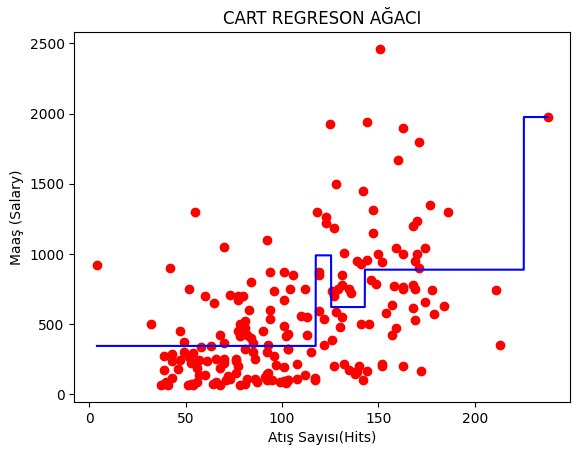

In [ ]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, Y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)');

## Bu görselleştirme incelendiğinde karmaşık görülüyor fakat buradaki her dallanma bir node yani bir düğüme eşittir. Görselden de görüldüğü üzere yatay olan yapıyı dikey düşününce düğümleri daha rahat görebiliyoruz.

In [ ]:
#%pip install SKompiler

Note: you may need to restart the kernel to use updated packages.


## skompiler oluşturduğumuz karar ağacının KURAL SETİNİ BİZE GÖSTERİYOR İF ELSE BLOKLARI İLE!!!

In [ ]:
from skompiler import skompile

In [ ]:
#%pip install astor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
print("Kurulan Karar Ağacının KARAR KURALI SETİ YANİ PYTHON KODU: ",skompile(cart_model.predict).to('python/code'))

Kurulan Karar Ağacının KARAR KURALI SETİ YANİ PYTHON KODU:  (345.2011551724138 if x[0] <= 117.5 else ((990.0634444444445 if x[0] <= 
    125.5 else 621.9679230769232) if x[0] <= 143.0 else 888.1370444444444) if
    x[0] <= 225.5 else 1975.0)



# Oluşturulan matematiksel metod ile bir tahmin yapalım

In [ ]:
x = [91] #tahmin etmek istediğimiz değer

In [ ]:
(345.2011551724138 if x[0] <= 117.5 else ((990.0634444444445 if x[0] <= 
    125.5 else 621.9679230769232) if x[0] <= 143.0 else 888.1370444444444) if
    x[0] <= 225.5 else 1975.0)

345.2011551724138

In [ ]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 888.13704444, 621.96792308, 345.20115517,
       345.20115517])

In [ ]:
cart_model.predict([[91]])

array([345.20115517])

## Görüldüğü üzere hem matematiksel form ile hem de cart_model.predict diyerekten yapıtğımız tahmin yapılarının sonuçları aynı 

## Şimdi ise tüm set üzerinde modelimizi bir analiz edelim ve hatalarını inceleyelim

In [ ]:
#hata kareler ortalaması validasyon için
print("Validasyon için hata kareler ortalaması:", np.sqrt(mean_squared_error(Y_train, cart_model.predict(X_train))))

Validasyon için hata kareler ortalaması: 356.7802743171108


In [ ]:
#r^2 değeri hesaplama validasyon için
print("R^2 değerleri hesaplama", r2_score(Y_train, cart_model.predict(X_train)))
#r'2 değeri anlamlılık oranı
print("R^2 değerleri hesaplama", 1-r2_score(Y_train, cart_model.predict(X_train)))


R^2 değerleri hesaplama 0.3567948230649177
R^2 değerleri hesaplama 0.6432051769350823


In [ ]:
#test için hata kareler
print("test için hata kareler", np.sqrt(mean_squared_error(Y_test, cart_model.predict(X_test))))


test için hata kareler 479.5201716052201


In [ ]:
#test için r2 değeri testi
print("test için r2 değeri ", r2_score(Y_test, cart_model.predict(X_test)))
#r2 anlamlılık testi test için
print("test için r2 değeri ", 1-r2_score(Y_test, cart_model.predict(X_test)))


test için r2 değeri  -0.06219516255496127
test için r2 değeri  1.0621951625549613


# Model Tuning for CART MODEL  

In [ ]:
cart_model = DecisionTreeRegressor(min_samples_split=2)
cart_model.fit(X_train, Y_train)
y_pred_for_test = cart_model.predict(X_test)

In [ ]:
#test için hata kareler
print("test için hata kareler", np.sqrt(mean_squared_error(Y_test, y_pred_for_test)))

test için hata kareler 468.49579052913884


## Yukarıda test için yaptığımız hata kareler ortalaması değeri çok yüksek çünkü teorisinde de bahsettiğimiz üzere aslında Karar ağaç yapıları tahmin tarafında değil de kendine verilen veriyi çok muazzam bir biçimde sınıflayarak açıklanabilir hale getirdiğinden daha çok spesifik bir probleme genelleme ihtiyacı olmayan işlerde veriyi çok iyi açıkladığından bahsettik. 
## Yukarıda test hatasının 468 olduğunu görüyoruz aşağıda şimdi bir de train üzerinde deneyelim

In [ ]:
cart_model = DecisionTreeRegressor(min_samples_split=2)
cart_model.fit(X_train, Y_train)
y_pred_for_test = cart_model.predict(X_train)

In [ ]:
#hata kareler ortalaması validasyon için
print("Validasyon için hata kareler ortalaması:", np.sqrt(mean_squared_error(Y_train, cart_model.predict(X_train))))

Validasyon için hata kareler ortalaması: 231.67017321152872


## Train için hata kareler ortalaması incelendiğinde neredeyse yarı yarıya şiddetli bir düşüş olduğunu gözlemleyebiliyoruz.

## Şimdi GridSearchCV yöntemiyle optimum parametreler üzerine çalışalım.

In [ ]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, Y_train)
y_pred_for_test = cart_model.predict(X_test)

In [ ]:
cart_model_params = {'min_samples_split': range(2,100),
                     'max_leaf_nodes':range(2,10)}

In [ ]:
cart_cv_model = GridSearchCV(cart_model,cart_model_params, cv = 10)

In [ ]:
cart_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [ ]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [ ]:
cart_model_tuned = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)
cart_model_tuned.fit(X_train, Y_train)
y_pred_for_test = cart_model_tuned.predict(X_test)

In [ ]:
#test için hata kareler
print("test için hata kareler", np.sqrt(mean_squared_error(Y_test, y_pred_for_test)))

test için hata kareler 423.406689243066


## Hiperparametre sonucu incelendiğinde test için hata kareler toplamı düştü

## Şu ana kadar bağımsız değişkenlerimizden sadece atış sayıları ile modelimizi eğitip maaş tahmini yaptırmıştık karar ağaçlarına. Şimdi ise tüm bağımsız değişkenlerimizi ilk başta ilkel modelde test edelim sonrasında ise tune edilmiş model üzerinden tüm bağımsız değişkenlerimiz ile karar ağaç modelimizin eğitim ve test sonuçlarını inceleyelim

In [ ]:
hit = pd.read_csv('./Hitters.csv')
df = hit.copy()
df = df.dropna()
Y = df["Salary"]
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, Y_train)
y_pred_for_test = cart_model.predict(X_test)

In [ ]:
#test için hata kareler
print("test için hata kareler", np.sqrt(mean_squared_error(Y_test, y_pred_for_test)))

test için hata kareler 532.2738741871206


## Şimdi ise tüm veri setini karar ağaçlarına vermek üzere tekrardan ilkel modelimizi tune edilmiş formata çevirelim

In [ ]:
cart_model_params = {'min_samples_split': range(2,100),
                     'max_leaf_nodes':range(2,10)}

In [ ]:
cart_cv_model = GridSearchCV(cart_model,cart_model_params, cv = 10)

In [ ]:
cart_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [ ]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [ ]:
cart_model_tuned = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)
cart_model_tuned.fit(X_train, Y_train)
y_pred_for_test = cart_model_tuned.predict(X_test)

In [ ]:
#test için hata kareler
print("test için hata kareler", np.sqrt(mean_squared_error(Y_test, y_pred_for_test)))

test için hata kareler 376.39788207109865


## Görüldüğü üzere tüm veri setini karar ağacımıza en iyi parametreler ile verdik ve test hatamızın değeri düştü 376 oldu.

# Bagged Trees Regresyon

In [ ]:
hit = pd.read_csv('./Hitters.csv')
df = hit.copy()
df = df.dropna()
Y = df["Salary"]
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, Y_train)

BaggingRegressor(bootstrap_features=True)

In [ ]:
# Bagging için oluşan karar ağaç modeli sayısına bakalım
bag_model.n_estimators

10

In [ ]:
# Bagging için oluşan karar ağaçlarına tek tek bakalım
bag_model.estimators_

[DecisionTreeRegressor(random_state=382454582),
 DecisionTreeRegressor(random_state=1407413949),
 DecisionTreeRegressor(random_state=1483529501),
 DecisionTreeRegressor(random_state=1562999622),
 DecisionTreeRegressor(random_state=2019081346),
 DecisionTreeRegressor(random_state=1463077430),
 DecisionTreeRegressor(random_state=2115453246),
 DecisionTreeRegressor(random_state=1738298295),
 DecisionTreeRegressor(random_state=340594370),
 DecisionTreeRegressor(random_state=1345780441)]

In [ ]:
# Her bir ağaçtaki gözlemlerine bakalım
bag_model.estimators_samples_

[array([ 21,  61, 111, 148, 113,  88,  81,  69, 165,  34,  17, 152, 121,
          4, 107,  36,  64, 157,  86, 146,  87,  35, 166,  64,   3, 149,
        145,  18, 147, 127,  53,  59, 161,  68,  18,   6, 110,  22, 167,
        124, 121, 195,  41, 157, 186, 107,  53,  54,  98, 129, 106, 137,
        177, 176,  98, 115,  34, 126,   8,  85, 159, 187, 168, 145,  66,
         47,  90,  89, 190,  63, 160, 112, 102,  24,  20, 154, 143, 171,
          2, 130, 164, 148,  94,  99,  81,  96,  10, 126,  35,  88,  12,
         41,  99,   9,  11,  65,  67,  14,  66,  78,   0,  37,  54, 138,
         61,  65, 158, 181,  26,  51,  19,  41,  14, 111, 119,  49,  23,
        156,  29, 157,  80,   8, 139,  95,   1,  14, 180,  82, 110,  18,
         90,  64,  42,   0,  68,  15, 129,  68, 176, 139, 169,  18, 101,
        129, 162, 105, 154,  42,  29,  34,  63, 168, 195,  83, 131,  50,
         94, 188,  31,  33,  70, 174, 176,  63,  12,  55, 150, 152, 186,
         88,  71, 126,  15,  94, 191, 189,  73, 159

In [ ]:
#Her bir ağacın bağımsız değişkenlerine ulaşmak istersek ve indekslerine eriştik
bag_model.estimators_features_

[array([ 1, 18,  1, 17, 13, 11, 14, 15,  8,  5, 18,  5, 13,  6,  7, 12,  2,
        18, 14]),
 array([17, 14,  2,  1, 13, 11,  3,  6,  3,  7,  2,  8, 11,  2,  9,  4, 10,
        10, 15]),
 array([10,  3, 13,  7, 13, 17, 13, 11,  0,  8, 13,  4, 13,  7, 18,  0,  7,
         5,  8]),
 array([ 6,  0, 14, 11,  4, 10,  5, 14,  9, 17, 16,  5, 10, 17, 17,  8,  6,
         0,  9]),
 array([ 2,  4, 13,  8,  8,  4, 14,  1,  0, 11, 14,  2,  1, 13,  3,  2,  2,
         7,  6]),
 array([ 7, 14,  0, 16, 15, 13,  7,  6, 12, 12, 11,  8, 17, 10,  1, 15, 11,
        16, 16]),
 array([16,  3, 13,  3, 10,  9, 17, 12,  2, 14, 11, 11, 14, 12,  3,  9, 12,
         6, 12]),
 array([ 9, 17,  8,  5,  6, 10,  7, 14,  9,  9,  1,  8, 10,  3, 16,  1,  2,
         0, 13]),
 array([ 2,  5, 17, 10, 10, 11, 12,  9, 18,  8, 11,  8,  6,  9,  3, 17,  2,
        16,  4]),
 array([12, 11,  1,  0,  7,  7, 12,  3, 12, 14,  0, 13,  8,  6, 12,  3, 18,
        17,  2])]

In [ ]:
# istediğimiz bir modelin karar ağacı yapısına erişmek istersek indeks belirtip erişebiliriz
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=382454582)

In [ ]:
# istediğimiz bir modelin karar ağacı yapısına erişmek istersek indeks belirtip erişebiliriz
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=1407413949)

# Bagging Modelimiz ile Tahmin Yapalım ve Hata metriklerini değerlendirelim

In [ ]:
#test için hata kareler
print("test için hata kareler", np.sqrt(mean_squared_error(Y_test, bag_model.predict(X_test))))

test için hata kareler 345.6885967874586


## Yukarıda çıkan test hata kareler ortalaması 10 tane karar ağaç modellerinin hepsinin tahminlerini bir araya getirerek çıkartılan hata kareler ortalaması değeridir

### Şimdi can alıcı bir noktaya değinerekten bu çalışan ve 10 adet karar ağacının tahminine eriştik şimdi ise tek tek hangi karar ağacının hangi hata kareler ortalmasını verdiğini inceleyeceğiz bunu yapmamızın sebebi yüksek hata kareler ortalaması değeri veren modele HESAP SORMAKTIR!

In [ ]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, Y_train).predict(X_test)

In [ ]:
#ikinci ağaç için test tarafında hata kareler ortalaması
print("ikinci ağacın test için hata kareler ortalaması", np.sqrt(mean_squared_error(Y_test, iki_y_pred)))

ikinci ağacın test için hata kareler ortalaması 532.2592616607545


## Yukarıda ikinci ağacın performansını hesap sormak için test ettik ve gerçekten başarısız bir ağaçmış!

In [ ]:
yedinci_y_pred = bag_model.estimators_[6].fit(X_train, Y_train).predict(X_test)

In [ ]:
#yedinci ağaç için test tarafında hata kareler ortalaması
print("yedinci ağacın test için hata kareler ortalaması", np.sqrt(mean_squared_error(Y_test, yedinci_y_pred)))

yedinci ağacın test için hata kareler ortalaması 459.94107238472316


## Yukarıda yedinci ağacın performansını hesap sormak için test ettik ve gerçekten başarısız bir ağaçmış!

## Model Tuning

In [ ]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, Y_train)

BaggingRegressor(bootstrap_features=True)

In [ ]:
bag_params = {'n_estimators':range(2,20)}

In [ ]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [ ]:
bag_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [ ]:
bag_cv_model.best_params_

{'n_estimators': 16}

In [ ]:
bag_model_tuned = BaggingRegressor(n_estimators=16, random_state=45)
bag_model_tuned.fit(X_train, Y_train)

BaggingRegressor(n_estimators=16, random_state=45)

In [ ]:
#Tune edilmiş bag_model için test hatası analizi üzerinden hata kareler ortalaması değerini hesaplayalım
print("Tune edilmiş bag modelin test için hata kareler ortalaması", np.sqrt(mean_squared_error(Y_test, bag_model_tuned.predict(X_test))))

Tune edilmiş bag modelin test için hata kareler ortalaması 343.8174114256221


## Sonuç incelendiğinde hata kareler ortalamasında bir düşüş yaşanmıştır.

# Random Forests

In [ ]:
hit = pd.read_csv('./Hitters.csv')
df = hit.copy()
df = df.dropna()
Y = df["Salary"]
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

## Random Forest algoritmasının temel parametreleri ve bunların anlamları şunlardır:

#### n_estimators: Random Forest içinde bulunan ağaç sayısıdır. Bu parametre, kaç tane karar ağacının oluşturulacağını belirler. Genellikle bu değer ne kadar yüksek olursa modelin performansı o kadar iyi olur. Ancak aşırı yüksek değerler overfitting'e yol açabilir.
#### criterion: Karar ağaçlarının sınıflandırma performansını ölçmek için kullanılan kriterdir. "gini" veya "entropy" değerlerini alabilir. "gini" kriteri, Gini impurity ölçüsünü kullanarak, "entropy" ise bilgi kazancını hesaplamak için entropi ölçüsünü kullanır. Genellikle "gini" kullanılır, ancak bu durum veri setine ve problem türüne bağlıdır.
#### max_depth: Her bir karar ağacının maksimum derinliğini belirler. Bu parametre, ağaçların ne kadar karmaşık olabileceğini kontrol eder. Derin ağaçlar daha karmaşık ilişkileri öğrenebilir, ancak aşırı öğrenmeye yol açabilir.
#### min_samples_split: Bir düğümün ikiye bölünmesi için gereken minimum örnek sayısını belirler. Bu parametre, bir düğümün bölünmesi için gerekli olan en az örnek sayısını kontrol eder. Küçük bir değer daha fazla aşırı uyuma yol açabilirken, büyük bir değer daha az esneklik sağlar.
#### min_samples_leaf: Bir yaprağın minimum örnek sayısını belirler. Bu parametre, bir yaprağın oluşması için gereken minimum örnek sayısını kontrol eder. Küçük bir değer daha fazla aşırı uyuma yol açabilirken, büyük bir değer daha az esneklik sağlar.
#### max_features: Her bir ağaç için rastgele seçilecek özelliklerin maksimum sayısını belirler. Bu parametre, her ağacın rastgele özelliklerle eğitilmesini sağlar. "auto", "sqrt", "log2" veya bir sayı değeri alabilir. "auto", bütün özelliklerin kullanılmasını sağlar.

## En önemli parametreler birincisi fit edilecek ağaç sayısı ikincisi ise max_features'dır max_features = her bölünmede göze alınacak gözlem sayısıdır. ve Derinlik de önemlidir max_depth

# Tahmin

In [ ]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1180.145  ,  139.65167,  634.60833])

In [ ]:
#RF modeli için test hatası analizi üzerinden hata kareler ortalaması değerini hesaplayalım
print("RF modelinin test için hata kareler ortalaması", np.sqrt(mean_squared_error(Y_test, rf_model.predict(X_test))))

RF modelinin test için hata kareler ortalaması 344.8719613101134


## RF MODEL TUNING

In [ ]:
rf_params = {'max_depth': list(range(1,10)),
             'max_features':[3,5,10,15],
             'n_estimators':[100, 200, 500, 1000, 2000]} #200 500 1000 2000 girilirse iyi olur bilimsel açıklanmış

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

## Aşağıdaki yazan n_jobs = - 1 argümanı eşzamanlı yani paralel işlemleri de devreye alır ve bunun sayesinde işlemciyi maksimum performansta çalıştırır.

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10,
                           n_jobs=-1)

In [ ]:
rf_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [ ]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [ ]:
rf_tuned = RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)
rf_tuned.fit(X_train, Y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [ ]:
#Tune edilmiş rf modelimizin test hatalarını kontrol edelim
#Tuned RF modeli için test hatası analizi üzerinden hata kareler ortalaması değerini hesaplayalım
print("Tuned RF modelinin test için hata kareler ortalaması", np.sqrt(mean_squared_error(Y_test, rf_tuned.predict(X_test))))

Tuned RF modelinin test için hata kareler ortalaması 346.6020094552952


In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeylerinin Önemi")

NameError: name 'Importance' is not defined

## Yukarıda değişkenlerin önem düzeylerine erişmek istediğimzde yukarıdaki gibi bir görselleştirme yapabiliriz

### Görece!! Önemi az olanlar silinebilir ona göre ilerlenebilir